RMSE: 828.23
R²: -0.51
Cross-validation MSE (mean): 650759.48


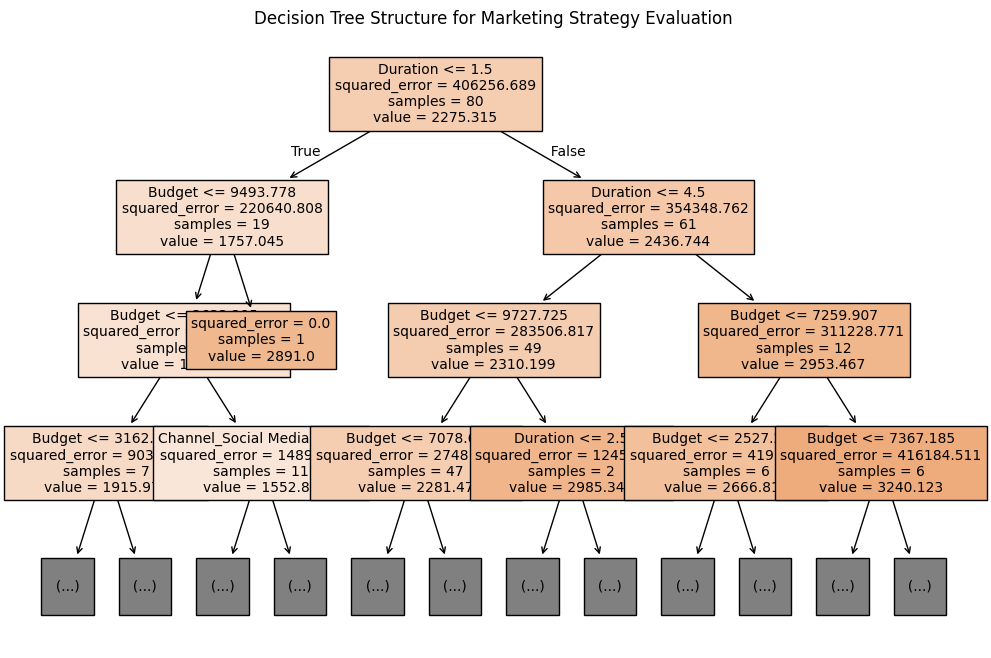

Top 3 Most Important Features:
          Feature  Importance
0          Budget    0.558114
1        Duration    0.344694
3  Audience_Young    0.033081


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)

data_size = 100
budget = np.random.uniform(1000, 10000, data_size)  
duration = np.random.randint(1, 6, data_size)  
audience = np.random.choice(['Young', 'Middle-aged', 'Old'], size=data_size)  
channel = np.random.choice(['Social Media', 'TV', 'Radio'], size=data_size)  

sales = 0.05 * budget + 200 * (duration) + np.random.choice([1000, 1500, 2000], size=data_size) + np.random.normal(0, 500, data_size)

df = pd.DataFrame({
    'Budget': budget,
    'Duration': duration,
    'Audience': audience,
    'Channel': channel,
    'Sales': sales
})

df = pd.get_dummies(df, columns=['Audience', 'Channel'], drop_first=True)

X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
cross_val = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Cross-validation MSE (mean): {-cross_val.mean():.2f}")

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure for Marketing Strategy Evaluation")
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(3)

print("Top 3 Most Important Features:")
print(feature_importance)
